In [19]:
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# Set Matplotlib Parameters
plt.style.use('fivethirtyeight')
plt.rc('text', usetex=True)   #  Might require installing TeX fonts
plt.rc('axes', facecolor='w', labelcolor='b', edgecolor='k', labelsize=14)
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

# Setting up the plot
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

['FantasyCoref' 'Litbank']


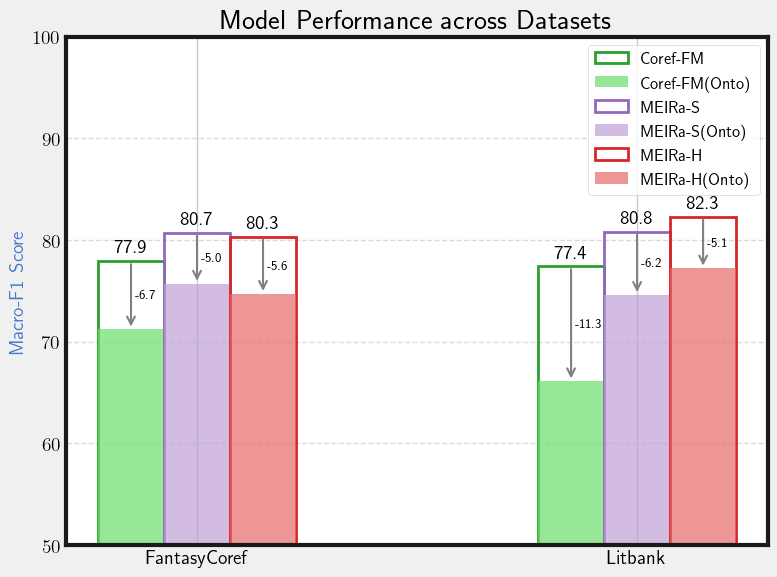

In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data preparation
data = {
    'Model': ['Coref-FM', 'MEIRa-S', 'MEIRa-H', 'Coref-FM', 'MEIRa-S', 'MEIRa-H'] * 2,
    'Macro-F1': [77.9, 80.7, 80.3, 71.2, 75.7, 74.7, 77.4, 80.8, 82.3, 66.1, 74.6, 77.2],
    'Type': ['Normal', 'Normal', 'Normal', 'Onto', 'Onto', 'Onto'] * 2,
    'Dataset': ['FantasyCoref'] * 6 + ['Litbank'] * 6
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Unique datasets and models for plotting
datasets = df['Dataset'].unique()
models = df['Model'].unique()

# Defining colors for each model (same as palette from seaborn example)
# colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#9467bd', '#d62728', '#000000']
colors_bar = ['#2ca02c', '#9467bd', '#d62728']
colors_shade = ["#6adf6a", "#bfa0d5", '#e76a6a']

# Setting the figure size
plt.figure(figsize=(8, 6))

# Define bar width and bar positions
bar_width = 0.15
index = np.arange(len(datasets))
print(datasets)

df_normal = df[df['Type'] == 'Normal']


df_onto = df[df['Type'] == 'Onto']


# Plotting each model's bar in each dataset
for i, model in enumerate(models):
    model_data = df_normal[df_normal['Model'] == model]
    dataset_means = [model_data[model_data['Dataset'] == dataset]['Macro-F1'].values[0] for dataset in datasets]
    
    plt.bar(index + i * bar_width, dataset_means, bar_width, label=model, facecolor='none', edgecolor=colors_bar[i], linewidth=2)
    ## Add value on top of the bar
    for j, value in enumerate(dataset_means):
        plt.text(index[j] + i * bar_width, value + 0.5, str(value), ha='center', va='bottom')
        
    model_onto_data = df_onto[df_onto['Model'] == model]
    
    dataset_means_onto = [model_onto_data[model_onto_data['Dataset'] == dataset]['Macro-F1'].values[0] for dataset in datasets]
    plt.bar(index + i * bar_width, dataset_means_onto, bar_width, label=model+ "(Onto)", linewidth=0, color=colors_shade[i], alpha=0.7)

    # Highlight difference between Normal and Onto with an arrow
    for j, (normal_value, onto_value) in enumerate(zip(dataset_means, dataset_means_onto)):
        if normal_value != onto_value:
            # Draw an arrow from the Normal bar to the Onto bar
            plt.annotate(
                '', 
                xy=(index[j] + i * bar_width, onto_value), 
                xytext=(index[j] + i * bar_width, normal_value), 
                arrowprops=dict(arrowstyle='->', color='gray', lw=1.5)
            )

            # Add the numeric difference beside the arrow
            diff = round(onto_value - normal_value, 1)
            plt.text(index[j] + i * bar_width + 0.01, (normal_value + onto_value) / 2, f'{diff}', color='black', ha='left', va='center', size=9)
        
# Adding labels and title
plt.title('Model Performance across Datasets')
plt.ylabel('Macro-F1 Score')
plt.xticks(index + bar_width * (len(models) / 2 - 0.5), datasets)

# Add a grid for the y-axis
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Set minimum and maximum values for y-axis
plt.ylim(50, 100)

# Adding a legend
plt.legend(title='Model')

## Shift position of legend
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

## Shift position of legend slightly to left
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))

# Adjust layout for better fit
plt.tight_layout()

# Display the plot
plt.show()